In [20]:
import pandas as  pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [21]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
# data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [25]:
X = data[['age','sex','bmi','children','smoker','region']]
y = data['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
numerical_features = ['age', 'sex', 'bmi', 'children', 'smoker']
numerical_transformer = StandardScaler()
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]
X_train_num_scaled = numerical_transformer.fit_transform(X_train_num)
X_test_num_scaled = numerical_transformer.transform(X_test_num)


In [27]:
categorical_features = ['region']
categorical_transformer = OneHotEncoder(drop='first')  
X_train_cat = X_train[categorical_features]
X_test_cat = X_test[categorical_features]
categorical_transformer.fit(X_train_cat)  
X_train_cat_encoded = categorical_transformer.transform(X_train_cat).toarray()
X_test_cat_encoded = categorical_transformer.transform(X_test_cat).toarray()


In [28]:
X_train_preprocessed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_preprocessed = np.hstack((X_test_num_scaled, X_test_cat_encoded))
print("Shape of X_train_preprocessed:", X_train_preprocessed.shape)
print("Shape of X_test_preprocessed:", X_test_preprocessed.shape)


Shape of X_train_preprocessed: (936, 8)
Shape of X_test_preprocessed: (402, 8)


In [29]:
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).ravel()


In [30]:
svr_model = SVR(kernel='rbf', C=1, epsilon=0.1)
svr_model.fit(X_train_preprocessed, y_train_scaled)


SVR(C=1)

In [31]:
y_pred_scaled = svr_model.predict(X_test_preprocessed)
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 19835300.77
R-squared: 0.86


In [34]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_preprocessed, y_train_scaled)
print("Best Parameters:", grid_search.best_params_) 

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


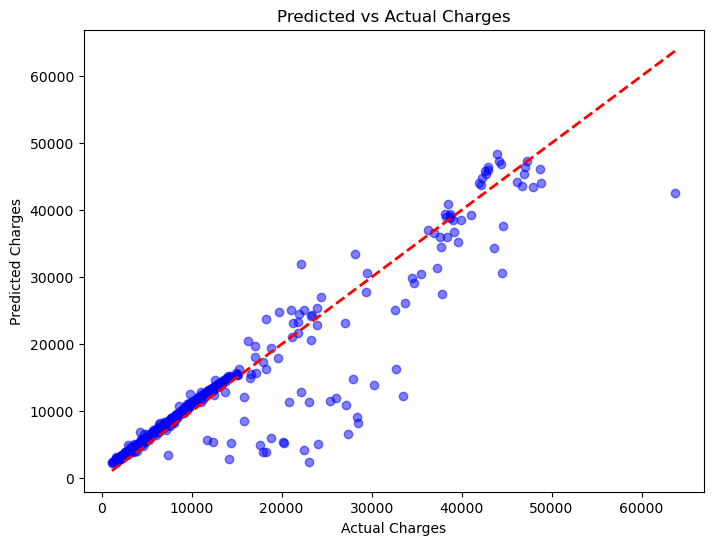

In [38]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Ideal 1:1 line
plt.title("Predicted vs Actual Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()
